In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

import seaborn as sns
from sklearn import datasets

## linnerud
a multi variate regression

In [2]:
dataset = datasets.load_linnerud()
dataset.feature_names
dataset.DESCR

['Chins', 'Situps', 'Jumps']

'Linnerrud dataset\n=================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 20\n    :Number of Attributes: 3\n    :Missing Attribute Values: None\n\nThe Linnerud dataset constains two small dataset:\n\n- *exercise*: A list containing the following components: exercise data with\n  20 observations on 3 exercise variables: Weight, Waist and Pulse.\n\n- *physiological*: Data frame with 20 observations on 3 physiological variables:\n   Chins, Situps and Jumps.\n\nReferences\n----------\n  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.\n'

In [3]:
>>> X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]]
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]]


In [4]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=500)
clf.fit(X, y)

clf.predict([X[0]])
clf.predict([ np.array([2,110,43])  ])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

array([[188.4  ,  35.884,  51.068]])

array([[154.24 ,  34.308,  63.792]])

##### boston

In [5]:
boston = datasets.load_boston()
# dataset.DESCR
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
# bos.head()

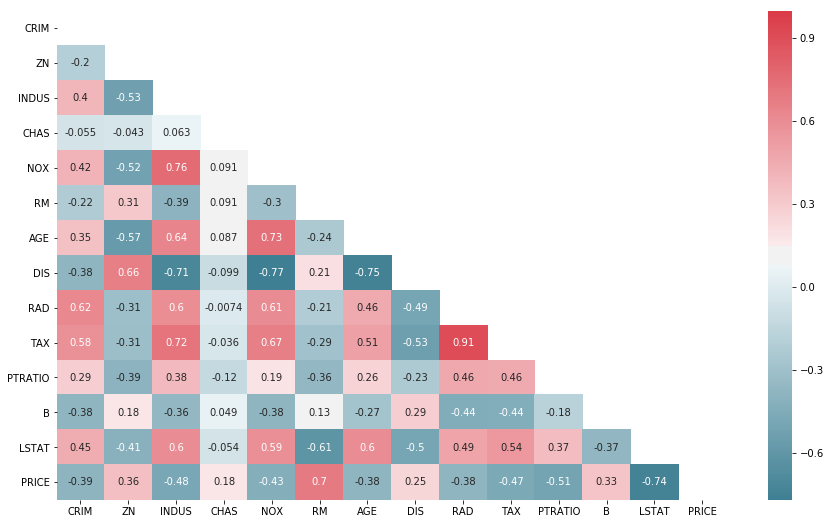

In [6]:
f, ax = plt.subplots(figsize=(15, 9))

# cmap ="YlGnBu"
# cmap = sns.diverging_palette(10, 220, sep=80, n=20)
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = bos.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,annot=True,cmap=cmap,mask=mask);

In [7]:
bos.corr(method='pearson').iloc[-1].sort_values(ascending=False)

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

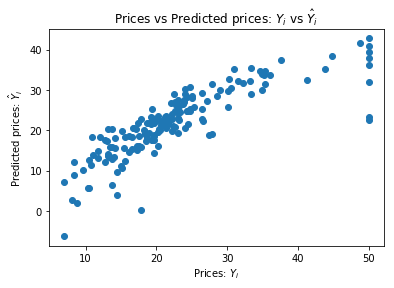

In [9]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.scatter(Y_test, Y_pred);

In [10]:
pd.DataFrame(lm.coef_,index=X.columns,columns=['regression coefficient']).T
print("MSE: {:.2f}\nR2 {:.2f}".format(mean_squared_error(Y_pred,Y_test),r2_score(Y_pred,Y_test)))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
regression coefficient,-0.156381,0.038549,-0.025063,0.78644,-12.946912,4.002689,-0.011602,-1.368288,0.341757,-0.013515,-0.988866,0.012059,-0.472644


MSE: 28.54
R2 0.59


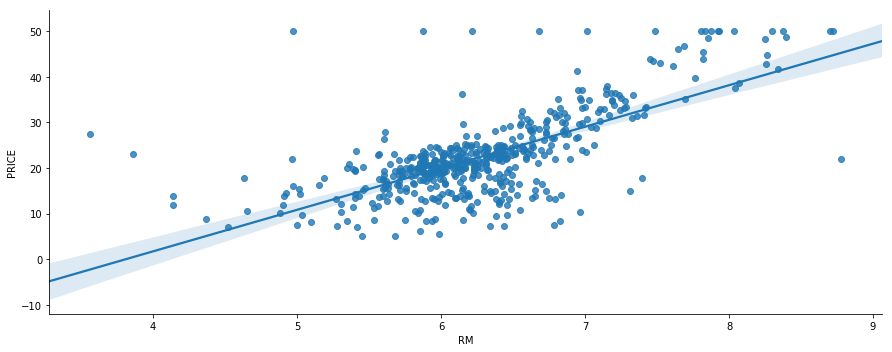

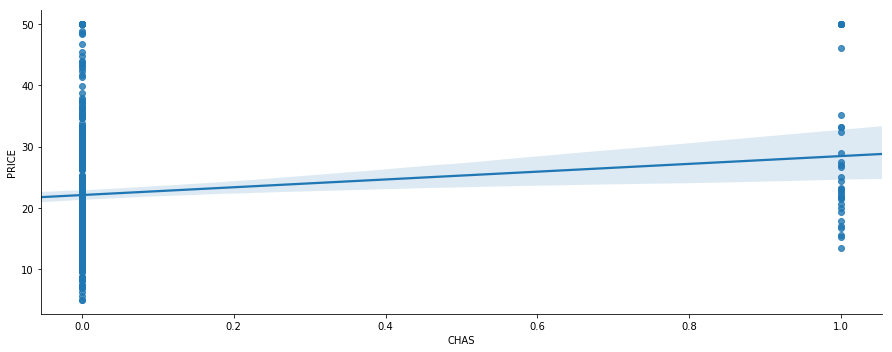

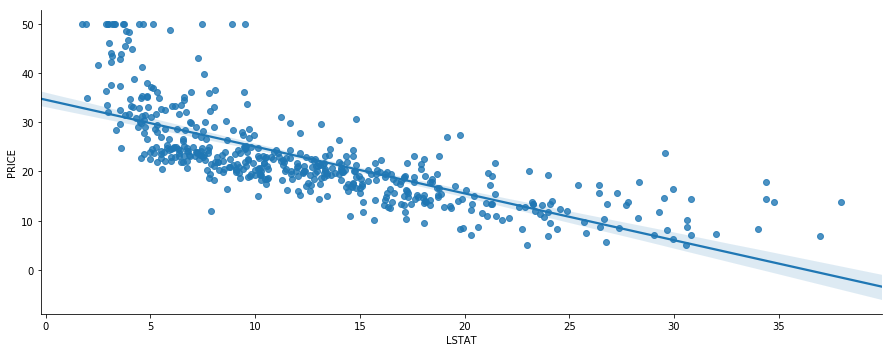

In [11]:
sns.lmplot(x="RM", y="PRICE", data=bos,aspect=2.5);
sns.lmplot(x="CHAS", y="PRICE", data=bos,aspect=2.5);
sns.lmplot(x="LSTAT", y="PRICE", data=bos,aspect=2.5);

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

<Figure size 864x432 with 0 Axes>

(-2.500224014336917, 52.50470430107526, -2.5, 52.5)

Text(0.5,0,'True price ($1000s)')

Text(0,0.5,'Predicted price ($1000s)')

RMSE: 2.84
R2 0.90
RMS: 2.8392413575271886 


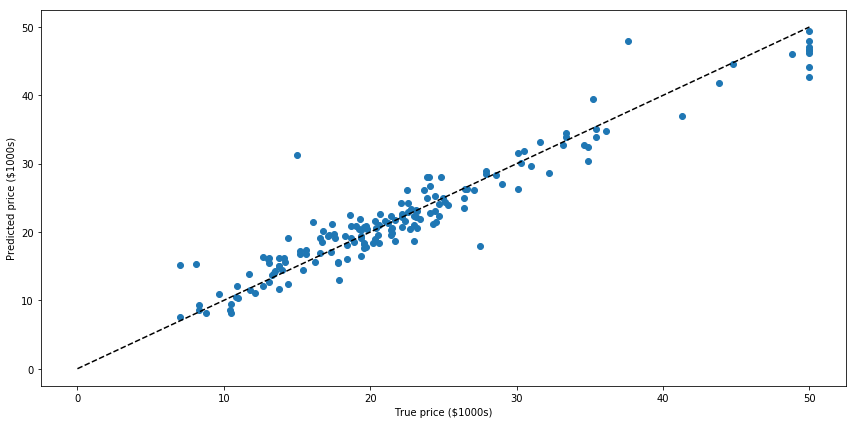

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
print("RMSE: {:.2f}\nR2 {:.2f}".format(mean_squared_error(Y_pred,Y_test) ** .5,r2_score(Y_pred,Y_test)))
print("RMS: %r " % np.sqrt(np.mean((Y_pred - Y_test) ** 2)))

In [43]:
#look at the values
# df = X_test

# pd.options.mode.chained_assignment = None
# df["act"] = Y_test
# df["pred"] = Y_pred
# df["err"] = (Y_pred - Y_test) / Y_test 
# df.head(20)
